# PROJETO 1 - Ciência dos Dados
 ## Ellen Beatriz Shen | 2B Engenharia

 ___

## Perguntas a serem respondidas:

**Pergunta 1:** É possível constatar que o "PIB per capita" e a "Renda" da Espanha, em relação ao PIB e a Renda mundial e dos países da Europa, foi aumentado ao entrar na União Europeia? Podemos dizer que o páis cresceu no seu desenvolvimento econômico? 


## Explicação da hipótese e mecanismo

A **União Europeia** é um bloco econômico e político constituido por 28 países europeus. Seus objetivos são ajudar os países-membros no seu desenvolvimento econômico, dar mais igualdade política e econômica à Europa, melhorar as condições econômicas e de trabalho dos cidadãos europeus, reduzir as desigualdades econômicas e sociais entre todas as regiões que compõem o bloco, garantir a permanência de um ambiente pacífico e harmonioso em toda a Europa. Suas características são livre circulação das pessoas pelos Estados-membros, livre circulação de mercadorias entre os Estados-membros, integração política, adoção de uma moeda única, o Euro.

- Como um dos objetivos principais da UE é o desenvolvimento econômico de seus países-membros, a hipótese busca comparar os dados de países pertencentes e não pertencentes a este bloco econômico. A análise vai ser baseada em um grupo de países que são economicamente similares, e que somente alguns entraram para a UE. Assim podemos utilizar variáveis como o 'PIB per capita' ao longo dos anos para a comparação.

## Bases de dados utilizadas

- dados retirados de https://www.gapminder.org/data/
- Variáveis:
 - PIB per capita
 - Renda


___

## Análise dos Dados 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from funcoes import *

In [2]:
#Leitura dos Dados
PIB = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')
renda = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')
mundo = pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_126307.xls', sheet_name="Data", skiprows=3)

In [3]:
#Trocando o indice dos dados.
idx_pib = PIB.set_index("country")
idx_r = renda.set_index("country")
idx_mundo= mundo.set_index("Country Name")

dados_pib = idx_pib.iloc[:,161:219]
dados_r = idx_r.iloc[:,161:219]
PIB_m = idx_mundo.iloc[:,3:59]

dados_PIB = dados_pib.dropna()
dados_renda = dados_r.dropna()
PIB_mundo = PIB_m.dropna()

In [4]:
#Lista de países da Europa e União Europeia para utilizar posteriormente como filtros
europa = ['Austria', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina',  'Cyprus',  'Czech Republic','Denmark', 'Spain',  'Estonia', 'Finland',  'France', 'United Kingdom',  'Greece', 'Croatia', 'Hungary', 'Ireland',  'Iceland',  'Italy',  'Lithuania', 'Latvia',  'Moldova', 'Malta',  'Montenegro', 'Netherlands',  'Poland',  'Portugal',  'Romania',  'Slovak Republic', 'Slovenia',  'Sweden',  'Turkey', 'Luxembourg', 'Germany']
uniao_europeia = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']


### PIB e Renda Espanha

In [5]:
#Filtração dos dados apenas da espanha

#PIB da espanha
PIB_espanha = dados_PIB.loc["Spain",:]
#Filtro do PIB antes e depois de 1986
PIB_espanha_antes = PIB_espanha[(PIB_espanha.index>1962) & (PIB_espanha.index<1986)]
PIB_espanha_depois = PIB_espanha[(PIB_espanha.index>1986)]

#Renda da espanha
renda_espanha = dados_renda.loc["Spain",:]
#Filtro do PIB antes e depois de 1986
renda_espanha_antes = renda_espanha[(renda_espanha.index>1962) & (renda_espanha.index<1986)]
renda_espanha_depois = renda_espanha[(renda_espanha.index>1986)]

Vamos começar plotando a evolução do indicador "PIB per capita" e "Renda" ao longo do tempo.

- Gráficos do PIB da Espanha antes e depois de 1986:


Text(0, 0.5, 'PIB Espanha')

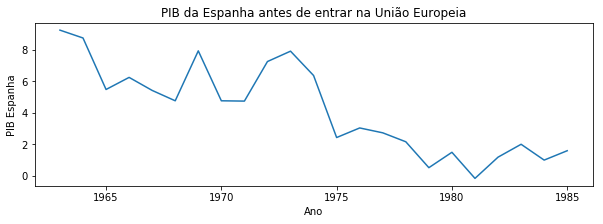

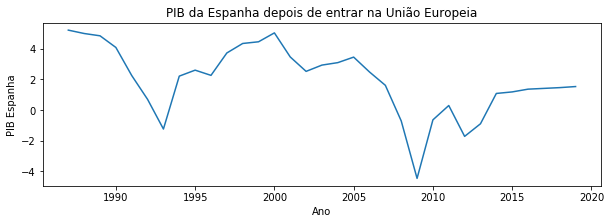

In [6]:
print("- Gráficos do PIB da Espanha antes e depois de 1986:")

plt.figure(figsize=(10,3))
plt.plot(PIB_espanha_antes.index,PIB_espanha_antes)
plt.title('PIB da Espanha antes de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

plt.figure(figsize=(10,3))
plt.plot(PIB_espanha_depois.index,PIB_espanha_depois)
plt.title('PIB da Espanha depois de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

- Gráfico da Renda da Espanha antes e depois de 1986:


Text(0, 0.5, 'Renda Espanha')

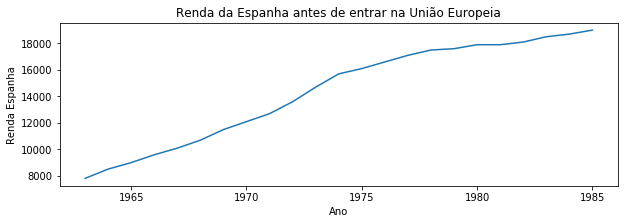

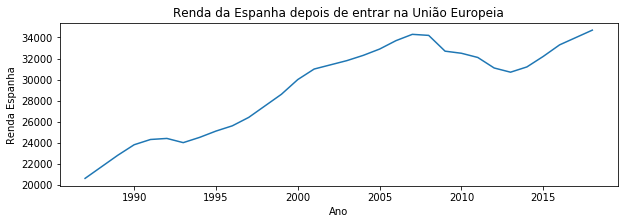

In [7]:
print("- Gráfico da Renda da Espanha antes e depois de 1986:")

plt.figure(figsize=(10,3))
plt.plot(renda_espanha_antes.index, renda_espanha_antes)
plt.title('Renda da Espanha antes de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('Renda Espanha')

plt.figure(figsize=(10,3))
plt.plot(renda_espanha_depois.index, renda_espanha_depois)
plt.title('Renda da Espanha depois de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('Renda Espanha')

É possivel analisar que há uma diferença no crescimento dos dados, porém ainda continuam parecidos, ficando difícil de poder retirar conclusões.

Podemos então utilizar um gráfico de dispersão para ambas variáveis e calcular sua linha de tendência.

Ajuste linear entre:
Coeficiente linear: 708.0862450592886
Coeficiente angular: -0.3565750988142293
Ajuste linear entre:
Coeficiente linear: 247.88180269607844
Coeficiente angular: -0.12276905080213904


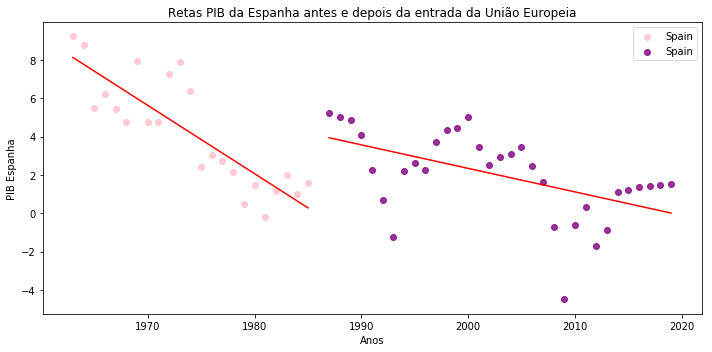

In [8]:
fig = plt.figure(figsize = (10,5))

#Trocando o index
index_antes = PIB_espanha_antes.reset_index()
index_depois = PIB_espanha_depois.reset_index()

reta_pib(index_antes["index"], index_antes.Spain,"pink")
reta_pib(index_depois["index"], index_depois.Spain,"purple")

Ajuste linear entre:
Coeficiente linear: -1055877.3320158103
Coeficiente angular: 542.1837944664032
Ajuste linear entre:
Coeficiente linear: -795552.1077712611
Coeficiente angular: 411.87683284457484


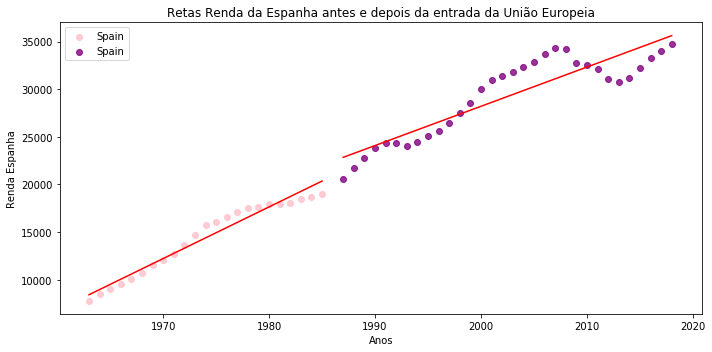

In [9]:
fig = plt.figure(figsize = (10,5))

#Trocando o index
index_renda_antes = renda_espanha_antes.reset_index()
index_renda_depois = renda_espanha_depois.reset_index()

reta_renda(index_renda_antes["index"], index_renda_antes.Spain,"pink")
reta_renda(index_renda_depois["index"], index_renda_depois.Spain,"purple")

- Após comparar os gráficos, percebemos que o PIB é afetado de maneira que seu coeficiente angular dos dados após a entrada para a UE é maior do que o coeficiente dos dados antes. Fazendo com que a queda do PIB seja mais constante.

- Já a Renda não foi muito afetada, pois seus coeficientes angulares continuam iguais, resultando em um crescimento quase constante antes e depois.

### PIB e Renda Europa e União Europeia

Ainda não conseguimos concluir muita coisa a partir desses dados, então vamos analisar os dados somente dos países europeus.

In [10]:
#Europa

#Criando uma coluna "Europa" para caso o páis pertencer ou não ao continente europeu.
dataframe_pib_europa = dados_PIB.loc[:,"Europa"] = "não"
dataframe_pib_europa = dados_PIB.loc[europa, "Europa"] = "sim"

#Filtro do PIB dos países da Europa
PIB_europa = dados_PIB.loc[dados_PIB.Europa=="sim",:]

#Criando uma coluna "Europa" para caso o páis pertencer ou não ao continente europeu.
dataframe_renda_europa = dados_renda.loc[:,"Europa"] = "não"
dataframe_renda_europa =  dados_renda.loc[europa, "Europa"] = "sim"

#Filtro da Renda dos países da Europa
renda_europa = dados_renda.loc[dados_renda.Europa=="sim",:]

/Users/ellenbeatriz/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ellenbeatriz/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


- Média do PIB e Renda da Europa:

In [11]:
descricao_pib_europa = PIB_europa.describe()
medias_pib_europa = descricao_pib_europa.loc["mean",:]
media_total_pib_europa = medias_pib_europa.mean()

descricao_renda_europa = renda_europa.describe()
medias_renda_europa = descricao_renda_europa.loc["mean",:]
media_total_renda_europa = medias_renda_europa.mean()

- Média do PIB e Renda do Mundo:

In [12]:
descricao_renda_mundo = dados_renda.describe()
medias_renda_mundo = descricao_renda_mundo.loc["mean",:]
media_total_renda_mundo = medias_renda_mundo.mean()

descricao_pib_mundo = dados_PIB.describe()
medias_pib_mundo = descricao_pib_mundo.loc["mean",:]
media_total_pib_mundo = medias_pib_mundo.mean()

#Filtração dos dados, antes e depois
media_pib_europa_depois = medias_pib_europa[(medias_pib_europa.index>1986)]
media_renda_europa_depois = medias_renda_europa[(medias_renda_europa.index>1986)]

media_pib_mundo_depois = medias_pib_mundo[(medias_pib_mundo.index>1986)]
media_renda_mundo_depois = medias_renda_mundo[(medias_renda_mundo.index>1986)]

- Médias do PIB e Renda da Espanha:

In [13]:
#Médias antes e depois

#PIB
media_PIB_espanha = PIB_espanha.mean()
media_PIB_espanha_antes = PIB_espanha_antes.mean()
media_PIB_espanha_depois = PIB_espanha_depois.mean()

#Renda
media_renda_espanha = renda_espanha.mean()
media_renda_espanha_antes = renda_espanha_antes.mean()
media_renda_espanha_depois = renda_espanha_depois.mean()

- Podemos fazer um join para comparar os dados:

In [14]:
dados_comparacao_pib_europa = {'País/Continente': ['Espanha', 'Europa'],'Média': [media_PIB_espanha, media_total_pib_europa]}
dados_comparacao_renda_europa = {'País/Continente': ['Espanha', 'Europa'],'Média': [media_renda_espanha, media_total_renda_europa]}

media_pib_espanhaXeuropa = pd.DataFrame(dados_comparacao_pib_europa, columns=['País/Continente', 'Média'])
idx_x = media_pib_espanhaXeuropa.set_index("País/Continente")
media_renda_espanhaXeuropa = pd.DataFrame(dados_comparacao_renda_europa, columns=['País/Continente', 'Média'])
idx_y = media_renda_espanhaXeuropa.set_index("País/Continente")

dataframe_comparacao = idx_x.join(idx_y, how='inner', lsuffix='_PIB', rsuffix='_Renda')
dataframe_comparacao

,Média_PIB,Média_Renda
País/Continente,,
Espanha,3.023948,22407.413793
Europa,2.358137,21730.141066


Aparentemente a Espanha tem uma média melhor do que o continente todo. Mas podemos ter uma visualização melhor comparando utilizando gráficos.

### PIB e Renda Espanha e Europa após 1986

Ajuste linear entre:
Coeficiente linear: -69.78361719096041
Coeficiente angular: 0.03569202985739751
Ajuste linear entre:
Coeficiente linear: 247.88180269607844
Coeficiente angular: -0.12276905080213904


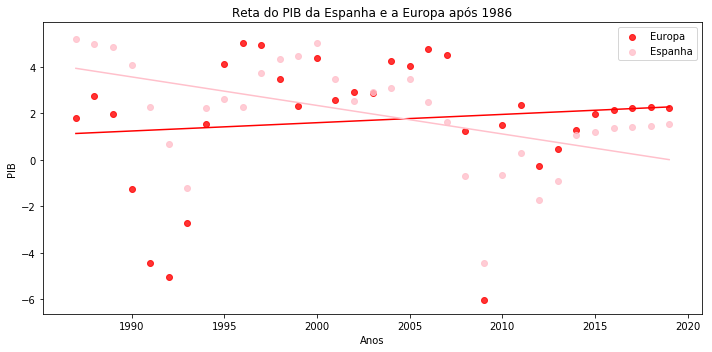

In [15]:
#Resetar o index
index_medias_pib_europa = media_pib_europa_depois.reset_index()
index_pib_espanha= PIB_espanha_depois.reset_index()

fig = plt.figure(figsize = (10,5))
reta_pib_europa_1986(index_medias_pib_europa["index"] , index_medias_pib_europa["mean"], "red", "Europa")
reta_pib_europa_1986(index_pib_espanha["index"], index_pib_espanha.Spain,"pink", "Espanha")
plt.legend()


Em relação ao PIB do continente europeu, o PIB da Espanha sofreu uma decaída.

Ajuste linear entre:
Coeficiente linear: -980706.1356416068
Coeficiente angular: 503.3612147871679
Ajuste linear entre:
Coeficiente linear: -795552.1077712611
Coeficiente angular: 411.87683284457484


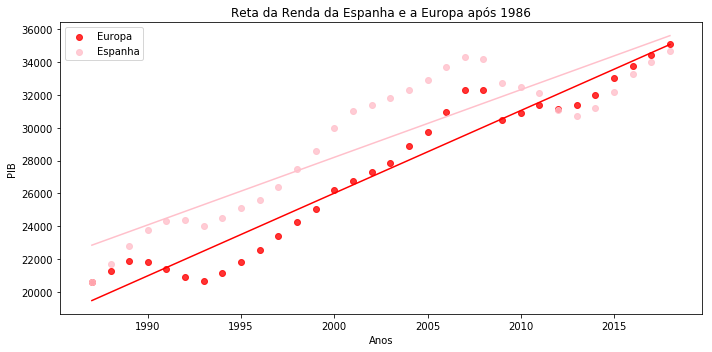

In [16]:
#Resetar o index
index_medias_renda_europa = media_renda_europa_depois.reset_index()
index_renda_espanha= renda_espanha_depois.reset_index()

fig = plt.figure(figsize = (10,5))
reta_renda_europa_1986(index_medias_renda_europa["index"] , index_medias_renda_europa["mean"],"red","Europa")
reta_renda_europa_1986(index_renda_espanha["index"], index_renda_espanha.Spain,"pink","Espanha")


Já a Renda, em relação ao continente europeu, não obteve uma grande mudança em seu crescimento. Apenas uma angulação levemente diferente.

### PIB e Renda Espanha e Mundo após 1986

Ajuste linear entre:
Coeficiente linear: 247.88180269607844
Coeficiente angular: -0.12276905080213904
Ajuste linear entre:
Coeficiente linear: -163.5639384456156
Coeficiente angular: 0.08265007404644432


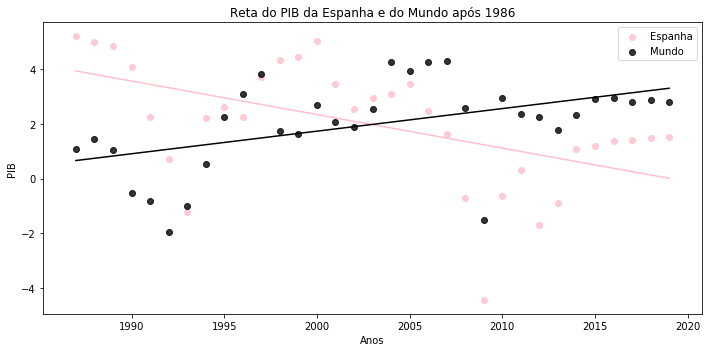

In [17]:
#Resetar o index
index_medias_pib_mundo = media_pib_mundo_depois.reset_index()

fig = plt.figure(figsize = (10,5))
reta_pib_mundo_1986(index_pib_espanha["index"], index_pib_espanha.Spain,"pink","Espanha")
reta_pib_mundo_1986(index_medias_pib_mundo["index"] , index_medias_pib_mundo["mean"],"black","Mundo")
plt.legend()

Em relação ao Mundo, o PIB da Espanha entra em decréscimo.

Ajuste linear entre:
Coeficiente linear: -795552.1077712611
Coeficiente angular: 411.87683284457484
Ajuste linear entre:
Coeficiente linear: -460403.28588861617
Coeficiente angular: 237.23493743637272


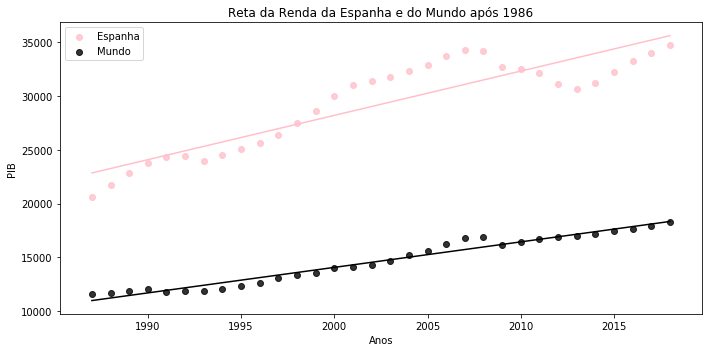

In [18]:
#Resetar o index
index_medias_renda_mundo = media_renda_mundo_depois.reset_index()

fig = plt.figure(figsize = (10,5))
reta_renda_mundo_1986(index_renda_espanha["index"], index_renda_espanha.Spain,"pink","Espanha")
reta_renda_mundo_1986(index_medias_renda_mundo["index"] , index_medias_renda_mundo["mean"],"black","Mundo")
plt.legend()

A Renda novamente, não obteve mudanças drásticas.

## Conclusão

Após as análises, percebe-se que a Renda é uma variável mais constante no tempo e indepedente de acontecimentos como a entrada à União Europeia. 
Enquanto o PIB per capita, ao analisar a Espanha sozinha, obteve decaímento em um intervalo maior de tempo em relação aos anos anteriores.
Ao comparar com o PIB da Europa e do Mundo, é perceptível que sua correlação é negativa, enquanto a correlação da Europa e do Mundo é positivo.
Conclui-se então, que não houve grande desenvolvimento econômico na Espanha após sua entrada para a União Europeia.